<h6>Fall 2021 - CPSC 483-02<br>
Project 2 - <br>
Sean Javiya <br>
Jake Wong <br>
</h6>
In Project 1 - Anomaly Detection, we were given a dataset containing a list of students and their Zoom attendance over a 5 week course.<br>We performed various statistical tests on the data, in order to develop a function that will parse the provided dataset and output a list of students who were tardy or under-attended.<br>We developed two functions using different statistical methods of detecting anomalies in the dataset.<br>We conducted an analysis on the results and determined which function was more appropriate for the given dataset.
^rewrite

<h3>Experiment 1:</h3>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from IPython.display import Markdown as md

xvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=(0,1))
yvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=2)
randomnumber = np.random.randint(0, yvalues.size, size= int(yvalues.size/10))
print ("We are given ", yvalues.size, " rows of x_1, x_2, and y values.")
xtrain = xvalues
ytrain = yvalues
xtest1 = []
xtest2 = []
ytest = [] #10%
randomnumber[::-1].sort()
for n in randomnumber:
    xtest1.append(xvalues[n, 0])
    xtest2.append(xvalues[n, 1])
    ytest.append(yvalues[n])
    xtrain = np.delete(xtrain, n, 0)
    ytrain = np.delete(ytrain, n, 0)
xtest = np.stack((xtest1, xtest2), axis= -1)
ytest = np.asarray(ytest)
print ("We take ", ytrain.size, " rows for training.")
print ("The remaning ", ytest.size, " rows of x_1, x_2, and y_2 values are set aside for testing.")

We are given  1000  rows of x_1, x_2, and y values.
We take  900  rows for training.
The remaning  100  rows of x_1, x_2, and y_2 values are set aside for testing.


<h3>Experiment 2:</h3>

In [31]:
print (np.hstack((xvalues,yvalues[:, np.newaxis])))
Xtrain = np.hstack((np.ones_like(xtrain), xtrain))
Xtrain = np.delete(Xtrain, 0, 1)
weights = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(ytrain)
print ("\nIn our linear model, our y-intercept and coefficients are: ", weights)


[[-0.59828843  0.46192254 -1.34862803]
 [-1.74575782 -1.41239652  1.67154097]
 [-1.16639696 -0.06900688 -1.99250735]
 ...
 [ 0.60744114 -2.60559204  5.49405816]
 [ 0.04306784 -3.45458992  3.50732545]
 [ 0.06279166 -0.0365992  -1.7696464 ]]

In our linear model, our y-intercept and coefficients are:  [7.14100729e-01 3.59296170e-02 4.30879402e-04]


Given $x_{1}$ $x_{2}$ and $y$<br><br>
>$X=\begin{bmatrix}1&x_{11}&x_{12}\\1&x_{21}&x_{22}\\1&x_{31}&x_{32}\\\vdots&\vdots&\vdots\\1&x_{n1}&x_{n2}\end{bmatrix}$<br>
$y=\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix}$<br>

Find the weight values $w$ below:<br>
> $w=\begin{bmatrix}w_{0}\\w_{1}\\w_{2}\end{bmatrix}$<br>

The equation of our model will be:<br>
>$y = \begin{bmatrix}  X \end{bmatrix} \begin{bmatrix} w \end{bmatrix} $<br>

In the code we have the <code>weights</code>, which is equivalent to $w$, dotted with the <code>xtrain</code>, which is equivalent to $X$ and <code>ytrain</code> which is equivalent to $y$. <br>
> $ytrain = weights \cdot xtrain$<br>

When we do the dot product of these it gets the equation below:<br>
> $y = w_{0} + w_{1} * x_{1} + w_{2} * x_{2}$<br><br>

And when solving for $w$ we get:<br>
> <h1> $(X^T X)^{-1} X^T y = w$ </h1> <br>

We use this equation in the code to get all the weights.<br>
In out implementation we solve for the weights in this fashion: <br>
<code>weights = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(ytrain)</code><br>

The model we get for this experiment as an output after finding the weights is:

In [32]:
md(f"$y = $ {weights[0]} $ + $ {weights[1]} $ * x_{1} + $ {weights[2]} $ * x_{2}$")

$y = $ 0.7141007291614134 $ + $ 0.0359296170348964 $ * x_1 + $ 0.0004308794023263826 $ * x_2$

<h3>Experiment 3:</h3>

In [33]:
predicteddata = []
predictrange = ytrain.size
predictrange -= 1
while predictrange >= 0:
    prediction = weights[0] * Xtrain[predictrange,0] + weights[1] * Xtrain[predictrange, 1] + weights[2] * Xtrain[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
linearsquaredloss = 0
while predictrange >= 0:
    linearsquaredloss += (ytrain[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
linearsquaredloss = linearsquaredloss / ytrain.size
print ("The MSE, or average squared loss, of our linear model is ", linearsquaredloss)

The MSE, or average squared loss, of our linear model is  8.637413517392195


<h3>Experiment 4:</h3>

In [34]:
Xquadratic = np.hstack((np.ones_like(xtrain), xtrain, xtrain**2))
Xquadratic = np.delete(Xquadratic, 0, 1)
quadweights = np.linalg.inv(Xquadratic.transpose().dot(Xquadratic)).dot(Xquadratic.transpose()).dot(ytrain)
#print("In our quadratic model, our y-intercept and coefficients are: \n", quadweights, "\n")
quadpredicteddata = []
predictrange = ytrain.size
predictrange -= 1
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadratic[predictrange, 0] + quadweights[1] * Xquadratic[predictrange, 1] + quadweights[2] *Xquadratic[predictrange, 2] + quadweights[3] * Xquadratic[predictrange, 3] + quadweights[4] * Xquadratic[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
quadsquaredloss = 0
while predictrange >= 0:
    quadsquaredloss += (ytrain[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
quadsquaredloss = quadsquaredloss / ytrain.size
print ("The MSE of our quadratic model is ", quadsquaredloss)

The MSE of our quadratic model is  8.628526287156301


>$X=\begin{bmatrix}1&x_{11}&x_{12}&x_{11}^2&x_{12}^2\\1&x_{21}&x_{22}&x_{21}^2&x_{22}^2\\1&x_{31}&x_{32}&x_{31}^2&x_{32}^2\\\vdots&\vdots&\vdots&\vdots&\vdots\\1&x_{n1}&x_{n2}&x_{n1}^2&x_{n2}^2\end{bmatrix}$<br>
$y=\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix}$<br>
$w=\begin{bmatrix}w_{0}\\w_{1}\\w_{2}\\w_{3}\\w_{4}\end{bmatrix}$<br>

We solve for w:
<h1>$(X^T X)^{-1} X^T y = w$</h1><br>

The quadratic model is $y = w_{0} + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{1}^2 + w_{4}x_{2}^2$

In [35]:
md(f"The actual Equation:<br>$y = $ {quadweights[0]} $ + ${quadweights[1]}$ * x_{1} + ${quadweights[2]}$ * x_{2} + ${quadweights[3]}$ * x_{1}^2 + ${quadweights[4]}$ * x_{2}^2$")

The actual Equation:<br>$y = $ 0.6232116575825342 $ + $0.03544847008918881$ * x_1 + $0.0016596149563603835$ * x_2 + $0.03904870951851164$ * x_1^2 + $-0.00024190687628006854$ * x_2^2$

<h3>Experiment 5:</h3>

In [36]:
Xtest = np.hstack((np.ones_like(xtest), xtest))
Xtest = np.delete(Xtest, 0, 1)
predicteddata = []
predictrange = ytest.size
predictrange -= 1
while predictrange >= 0:
    prediction = weights[0] * Xtest[predictrange,0] + weights[1] * Xtest[predictrange, 1] + weights[2] * Xtest[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
lintest_squaredloss = 0
while predictrange >= 0:
    lintest_squaredloss += (ytest[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
lintest_squaredloss = lintest_squaredloss / ytest.size
print ("When our linear model was applied to our test data, the MSE was ", lintest_squaredloss)

When our linear model was applied to our test data, the MSE was  7.958635915437375


<h3>Experiment 6:</h3>

In [37]:
Xquadtest = np.hstack((np.ones_like(xtest), xtest, xtest**2))
Xquadtest = np.delete(Xquadtest, 0, 1)

quadpredicteddata = []
predictrange = ytest.size
predictrange -= 1
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadtest[predictrange, 0] + quadweights[1] * Xquadtest[predictrange, 1] + quadweights[2] * Xquadtest[predictrange, 2] + quadweights[3] * Xquadtest[predictrange, 3] + quadweights[4] * Xquadtest[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
quadtest_squaredloss = 0
while predictrange >= 0:
    quadtest_squaredloss += (ytest[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
quadtest_squaredloss = quadtest_squaredloss / ytest.size
print ("When our quadratic model was applied to our test data, the MSE was ", quadtest_squaredloss)


When our quadratic model was applied to our test data, the MSE was  7.957498821359082


about the same, while quadratic is better slightly

<h3>Experiment 7 & 8:</h3>

MSE by Model Order


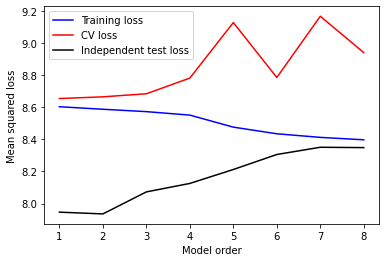

In [38]:
max_order = 8
K = 5
cv_loss = np.zeros((K,max_order+1))
ind_loss = np.zeros((K,max_order+1))
train_loss = np.zeros((K,max_order+1))
fold_weights = np.zeros((K,max_order+1,max_order*2+1))

x_train = xtrain
x_ktest = xtest 

for k in range(max_order+1)[1:]:
    for fold in range(K):
        y_fold = ytrain[fold*180 : (fold+1)*180]
        y_train = np.delete(ytrain, (range(fold*180, (fold+1)*180)))
        
        X_fold = x_train[fold*180 : (fold+1)*180, : ]
        X_fold = np.hstack((np.ones_like(y_fold)[:, np.newaxis], X_fold))
        
        X_train = np.delete(x_train, (range(fold*180, (fold+1)*180)), 0)
        X_train = np.hstack((np.ones_like(y_train)[:, np.newaxis], X_train))
        
        x_test = np.hstack((np.ones_like(ytest)[:, np.newaxis], x_ktest))
        
        wfold = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,y_train))
        
        indpred = np.dot(x_test,wfold)
        foldpred = np.dot(X_fold,wfold)
        trainpred = np.dot(X_train,wfold)
        
        cv_loss[fold,k] = ((foldpred - y_fold)**2).mean()
        ind_loss[fold,k] = ((indpred - ytest)**2).mean()
        train_loss[fold,k] = ((trainpred - y_train)**2).mean()
        #fold_weights[(k-1)*(max_order*2+1):(k*max_order*2+1),k,fold] = wfold
        fold_weights[fold,k,:k*2+1]= wfold
    x_train = np.hstack((x_train,xtrain**(k+1)))
    x_ktest = np.hstack((x_ktest,xtest**(k+1)))    

order = np.arange(max_order+1)
plt.plot(order[1:],train_loss.mean(axis=0)[1:],'b-',label="Training loss")
plt.plot(order[1:],cv_loss.mean(axis=0)[1:],'r-',label="CV loss")
plt.plot(order[1:],ind_loss.mean(axis=0)[1:],'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')
print("MSE by Model Order")
#print (cv_loss[:,2].mean())
#print (cv_loss[:,3].mean())


Experiment 7 examines how we can use cross validation to fit the dataset.<br>
Cross Validation works by taking a dataset and splitting into $K$ amounts of folds. It will then test each of these using the normal validation method by assigning one of the folds as the validation set and the rest as the training set. The difference here is the validation set will be swapped to the next set within the folds after and continue until all $K$ folds have been the validation set once.<br>
In our version we will do this for each order up to a designated limit which was assigned to us as 8.<br>
In this method we first define the three different types of loss which will be graphed later:<br>
1)$train\_loss$: Training Loss<br>
2)$ind\_loss$: Independent Loss<br>
3)$cv\_loss$: Cross Validation Loss<br>
We also defined the weights to be held in a 3d array in roder for it to be examined later.<br> This array is $fold\_weights[][][]$ in which the first index is the fold being examined, the second index being the order being examined, and finally the last index is the index of the weight on the equation.<br>
The parameters which we were assigned beforehand were to break up the data into 5 folds, $K$, and to go up to a max order of 8, $max_order$.<br>
The actual method itself is contained in 2 loops:<br>
1)The outerloop being a loop to go over each order from 1 to 8.<br>
2)The innerloop being a loop to go over each fold from 0 to 4.<br>

NEED AN EXPLANATION FOR THE XTRAIN,YTRAIN,XFOLD,etc BEFORE PREDICTIONS.<br>

The next part uses the data we just collected and sorted to make the 3 intial predictins:<br>
1)indpred: $x\_test\cdot wfold$ which makes the independent prediction<br>
2)foldpred: $x\_fold \cdot wfold$ which makes the fold prediction <br>
3)trainpred $x\_train \cdot wfold$ which makes the train prediction<br><br>

After that we begin to fill the loss arrays from earlier by taking th squared loss from each prediction and get their average and add it to the matching array.<br>

The $foldweights$ will then update with all the weights from that current loop and thus ending the first iteration of the most innerloop.<br>

Once the most inner loop has finished it will move onto the last part of the first loop and SOMETHING I DONT REALLY KNOW.<br>

The final part of the method after the 2 loops have finished will move onto experiment 8 where we plot all the data we obtained from this experiment.<br>

around 3rd or 4th order, it starts to overfit

Experiment 8 analysis

In [39]:
print("When our 2nd order polynomial is applied to the training data, the average MSE across our \n5-fold cross validation is:")
print (train_loss[:,2].mean())
print("\nWhen our 2n order polynomial is applied to the cross-validation data, the average MSE across our \n5-fold cross validation is:")
print (cv_loss[:,2].mean())

print ("\n\nSometimes it may appear that 3rd and 6th order polynomials are more appropriate. \nThis is due to random sampling for train-test split.")
print("\nWhen our 3rd order polynomial is applied to the test data, the average MSE across our \n5-fold cross validation is:")
print (ind_loss[:,3].mean())
print("\nWhen our 4th order polynomial is applied to the test data, the average MSE across our \n5 fold cross validation is:")
print (ind_loss[:,4].mean())

#print("\nThe 5 sets of y-intercept and coefficients for the 5th order polynomial models generated during \ncross-validation are:\n")
#desired_order = 2
#print(fold_weights[:,desired_order,:desired_order*2+1])

print("\nThe 5 models generated while performing cross-validation for the 2nd order (quadratic) are:")
# + ${fold_weights[0][5][5]}$ * x_{1}^3 + ${fold_weights[0][5][6]}$ * x_{2}^3 + ${fold_weights[0][5][7]}$ * x_{1}^4 + ${fold_weights[0][5][8]}$ * x_{2}^4 + ${fold_weights[0][5][9]}$ * x_{1}^2 + ${fold_weights[0][5][10]}$ * x_{2}^5$<br> $y = $ {fold_weights[1][4][0]} $ + ${fold_weights[1][5][1]}$ * x_{1} + ${fold_weights[1][5][2]}$ * x_{2} + ${fold_weights[1][5][3]}$ * x_{1}^2 + ${fold_weights[1][5][4]}$ * x_{2}^2 + ${fold_weights[1][5][5]}$ * x_{1}^3 + ${fold_weights[1][5][6]}$ * x_{2}^3 + ${fold_weights[1][5][7]}$ * x_{1}^4 + ${fold_weights[1][5][8]}$ * x_{2}^4 + ${fold_weights[1][5][9]}$ * x_{1}^2 + ${fold_weights[1][5][10]}$ * x_{2}^5$<br> $y = $ {fold_weights[2][4][0]} $ + ${fold_weights[2][5][1]}$ * x_{1} + ${fold_weights[2][5][2]}$ * x_{2} + ${fold_weights[2][5][3]}$ * x_{1}^2 + ${fold_weights[2][5][4]}$ * x_{2}^2 + ${fold_weights[2][5][5]}$ * x_{1}^3 + ${fold_weights[2][5][6]}$ * x_{2}^3 + ${fold_weights[2][5][7]}$ * x_{1}^4 + ${fold_weights[2][5][8]}$ * x_{2}^4 + ${fold_weights[2][5][9]}$ * x_{1}^2 + ${fold_weights[2][5][10]}$ * x_{2}^5$<br> $y = $ {fold_weights[3][4][0]} $ + ${fold_weights[3][5][1]}$ * x_{1} + ${fold_weights[3][5][2]}$ * x_{2} + ${fold_weights[3][5][3]}$ * x_{1}^2 + ${fold_weights[3][5][4]}$ * x_{2}^2 + ${fold_weights[3][5][5]}$ * x_{1}^3 + ${fold_weights[3][5][6]}$ * x_{2}^3 + ${fold_weights[3][5][7]}$ * x_{1}^4 + ${fold_weights[3][5][8]}$ * x_{2}^4 + ${fold_weights[3][5][9]}$ * x_{1}^2 + ${fold_weights[3][5][10]}$ * x_{2}^5$<br>$y = $ {fold_weights[4][4][0]} $ + ${fold_weights[4][5][1]}$ * x_{1} + ${fold_weights[4][5][2]}$ * x_{2} + ${fold_weights[4][5][3]}$ * x_{1}^2 + ${fold_weights[4][5][4]}$ * x_{2}^2 + ${fold_weights[4][5][5]}$ * x_{1}^3 + ${fold_weights[4][5][6]}$ * x_{2}^3 + ${fold_weights[4][5][7]}$ * x_{1}^4 + ${fold_weights[4][5][8]}$ * x_{2}^4 + ${fold_weights[4][5][9]}$ * x_{1}^2 + ${fold_weights[4][5][10]}$ * x_{2}^5
md(f"$y = $ {fold_weights[0][2][0]} $ + ${fold_weights[0][2][1]}$ * x_{1} + ${fold_weights[0][2][2]}$ * x_{2} + ${fold_weights[0][2][3]}$ * x_{1}^2 + ${fold_weights[0][2][4]}$ * x_{2}^2$<br>")

When our 2nd order polynomial is applied to the training data, the average MSE across our 
5-fold cross validation is:
8.586964063521263

When our 2n order polynomial is applied to the cross-validation data, the average MSE across our 
5-fold cross validation is:
8.66434575148508


Sometimes it may appear that 3rd and 6th order polynomials are more appropriate. 
This is due to random sampling for train-test split.

When our 3rd order polynomial is applied to the test data, the average MSE across our 
5-fold cross validation is:
8.07253857764532

When our 4th order polynomial is applied to the test data, the average MSE across our 
5 fold cross validation is:
8.125276726798612

The 5 models generated while performing cross-validation for the 2nd order (quadratic) are:


$y = $ 0.536488798005346 $ + $0.047309416562410604$ * x_1 + $0.006982102719533566$ * x_2 + $0.04561159622871649$ * x_1^2 + $0.00221299321068917$ * x_2^2$<br>

In [40]:
md(f"$y = $ {fold_weights[1][2][0]} $ + ${fold_weights[1][2][1]}$ * x_{1} + ${fold_weights[1][2][2]}$ * x_{2} + ${fold_weights[1][2][3]}$ * x_{1}^2 + ${fold_weights[1][2][4]}$ * x_{2}^2$<br>")

$y = $ 0.6694382231283258 $ + $0.015103938124528196$ * x_1 + $0.009665623987917562$ * x_2 + $0.020090395924147866$ * x_1^2 + $0.0028691087161204346$ * x_2^2$<br>

In [41]:
md(f"$y = $ {fold_weights[2][2][0]} $ + ${fold_weights[2][2][1]}$ * x_{1} + ${fold_weights[2][2][2]}$ * x_{2} + ${fold_weights[2][2][3]}$ * x_{1}^2 + ${fold_weights[2][2][4]}$ * x_{2}^2$<br>")

$y = $ 0.7031940230388047 $ + $0.0132065329789568$ * x_1 + $0.0023433887752651763$ * x_2 + $0.03172255990879813$ * x_1^2 + $-0.004614264874971255$ * x_2^2$<br>

In [42]:
md(f"$y = $ {fold_weights[3][2][0]} $ + ${fold_weights[3][2][1]}$ * x_{1} + ${fold_weights[3][2][2]}$ * x_{2} + ${fold_weights[3][2][3]}$ * x_{1}^2 + ${fold_weights[3][2][4]}$ * x_{2}^2$<br>")


$y = $ 0.6767241347091815 $ + $0.07286718843874454$ * x_1 + $-0.039982158169881314$ * x_2 + $0.03679053384418658$ * x_1^2 + $-0.004440297343117308$ * x_2^2$<br>

In [43]:
md(f"$y = $ {fold_weights[4][2][0]} $ + ${fold_weights[4][2][1]}$ * x_{1} + ${fold_weights[4][2][2]}$ * x_{2} + ${fold_weights[4][2][3]}$ * x_{1}^2 + ${fold_weights[4][2][4]}$ * x_{2}^2$<br>")

$y = $ 0.5255028868297121 $ + $0.029606505642611945$ * x_1 + $0.029343095176553386$ * x_2 + $0.0625455565734257$ * x_1^2 + $0.0033883862834081235$ * x_2^2$<br>

Usually 2nd order is better. Sometimes, 3 or 4 appears better. Random split of test and train data is the cause<br>


<h3>Experiment 9</h3>

In [44]:
X_train = np.hstack((np.ones_like(ytrain)[:, np.newaxis],xtrain,xtrain**2))
X_test = np.hstack((np.ones_like(ytest)[:, np.newaxis],xtest,xtest**2))
new_weights = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,ytrain))
new_pred = np.dot(X_train,new_weights)
new_loss = ((new_pred - ytrain)**2).mean()
print ("Our new 2nd order (quadratic) model has an MSE of: ", new_loss)

Our new 2nd order (quadratic) model has an MSE of:  8.594711255966615


>$X=\begin{bmatrix}1&x_{11}&x_{12}&x_{11}^2&x_{12}^2\\1&x_{21}&x_{22}&x_{21}^2&x_{22}^2\\1&x_{31}&x_{32}&x_{31}^2&x_{32}^2\\\vdots&\vdots&\vdots&\vdots&\vdots\\1&x_{n1}&x_{n2}&x_{n1}^2&x_{n2}^2\end{bmatrix}$<br>
$y=\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix}$<br>
$w=\begin{bmatrix}w_{0}\\w_{1}\\w_{2}\\w_{3}\\w_{4}\end{bmatrix}$<br>

We solve for w:
<h1>$(X^T X)^{-1} X^T y = w$</h1><br>

The quadratic model is $y = w_{0} + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{1}^2 + w_{4}x_{2}^2$

In [45]:

md(f"The actual Equation:<br>$y = $ {new_weights[0]} $ + ${new_weights[1]}$ * x_{1} + ${new_weights[2]}$ * x_{2} + ${new_weights[3]}$ * x_{1}^2 + ${new_weights[4]}$ * x_{2}^2$")

The actual Equation:<br>$y = $ 0.6232116575825343 $ + $0.03544847008918881$ * x_1 + $0.0016596149563603549$ * x_2 + $0.03904870951851163$ * x_1^2 + $-0.00024190687628008038$ * x_2^2$

<h3>Experiment 10:</h3>

The training data:


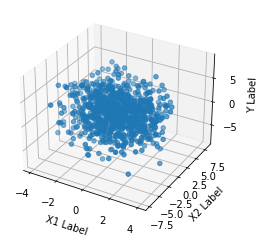

In [46]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xtrain[:,0], xtrain[:,1], ytrain)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

print ("The training data:")
plt.show()

I notice that it looks circular


<h3>Experiment 11:</h3>

The linear model:


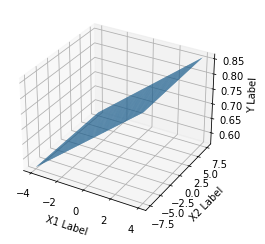

In [47]:
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(weights[0]+weights[1]*np.ravel(X)+weights[2]*np.ravel(Y))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

print ("The linear model:")
plt.show()

The quadratic model:


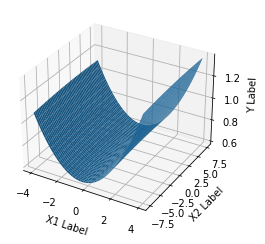

In [48]:
def quadEqu(x,y):
    return quadweights[0] + quadweights[1] * x + quadweights[2] * y + quadweights[3] * x**2 + quadweights[4] * y**2
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(quadEqu(np.ravel(X),np.ravel(Y)))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

print ("The quadratic model:")
plt.show()

The 2nd order (quadratic) model generated using the whole training set: 


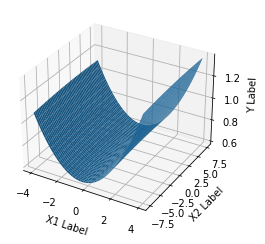

In [49]:
def polyEquation(x,y):
    return new_weights[0] + new_weights[1] * x + new_weights[2] * y + new_weights[3] * x**2 + new_weights[4] * y**2# + new_weights[5] * x**3 + new_weights[6] * y**3 + new_weights[7] * x**4 + new_weights[8] * y**4 + new_weights[9] * x**5 + new_weights[10] * y**5
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(polyEquation(np.ravel(X),np.ravel(Y)))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
print("The 2nd order (quadratic) model generated using the whole training set: ")

<h3>Experiment 12:</h3>

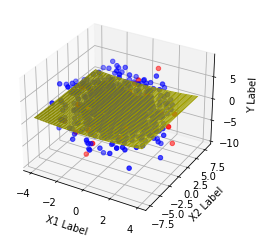

--Because of the 90-10% split, it is quite difficult to see the red points.
Nevertheless, the red points are the test data.
The blue points are the training data.
The yellow 3d surface is our 2nd order model generated using the entire training set.


In [50]:
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xtrain[:,0], xtrain[:,1], ytrain, color='b')
ax.scatter(xtest[:,0], xtest[:,1], ytest, color='red')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(polyEquation(np.ravel(X),np.ravel(Y)))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z, color='y')
plt.show()
print ("--Because of the 90-10% split, it is quite difficult to see the red points.")
print ("Nevertheless, the red points are the test data.")
print ("The blue points are the training data.")
print ("The yellow 3d surface is our 2nd order model generated using the entire training set.")


Suggests that this data's origin was a random number generator, where x_1 was a random number between -4 and 4, and x_2 was a random number between -8 and 8.<br>
(y was between 9 and -10, is that significant?)